In [1]:
import os
path = r'E:\repo\ml_bt\MA'
all_path = [os.path.join(path,x) for x in os.listdir(path) if 'MA' in x]
all_path[:-1]

['E:\\repo\\ml_bt\\MA\\MA1801.csv',
 'E:\\repo\\ml_bt\\MA\\MA1805.csv',
 'E:\\repo\\ml_bt\\MA\\MA1809.csv',
 'E:\\repo\\ml_bt\\MA\\MA1901.csv',
 'E:\\repo\\ml_bt\\MA\\MA1905.csv',
 'E:\\repo\\ml_bt\\MA\\MA1909.csv',
 'E:\\repo\\ml_bt\\MA\\MA2001.csv',
 'E:\\repo\\ml_bt\\MA\\MA2005.csv',
 'E:\\repo\\ml_bt\\MA\\MA2009.csv',
 'E:\\repo\\ml_bt\\MA\\MA2101.csv',
 'E:\\repo\\ml_bt\\MA\\MA2105.csv',
 'E:\\repo\\ml_bt\\MA\\MA2109.csv',
 'E:\\repo\\ml_bt\\MA\\MA2201.csv']

In [2]:
# 将全部的数据存入字典
import pandas as pd 
start_end_dic = {}
for e in all_path[:-1]:
    data = pd.read_csv(e,index_col=0)
    grag_volume= data.describe([0.1,0.25,0.3,0.4,0.5]).T.loc['volume','50%']
    grag_open_interest = data.describe([0.1,0.25,0.3,0.4,0.5]).T.loc['open_interest','40%']
    grag_open_interest2 = data.describe([0.1,0.25,0.3,0.4,0.5]).T.loc['open_interest','50%']
#     print(e,grag_volume,grag_open_interest,grag_open_interest2)
    data1 = data.copy()
    for i in data1.index:
        if data1.loc[i,'open_interest']>30000:
            start1 = i
            break
    for i in data1.index[::-1]:
        if 'MA2201' in e:
            end1 = len(data1)
            break
        if data1.loc[i,'open_interest']<60000 and data1.loc[i-1,'open_interest']>60000:
            end1 = i
            break
    print(e,start1,end1)
    data2 = data1.iloc[start1:end1,:]
    start_end_dic[e] = (start1,end1,data)
# start_end_dic

E:\repo\ml_bt\MA\MA1801.csv 5147 17185
E:\repo\ml_bt\MA\MA1805.csv 5180 17024
E:\repo\ml_bt\MA\MA1809.csv 4182 16912
E:\repo\ml_bt\MA\MA1901.csv 3897 17061
E:\repo\ml_bt\MA\MA1905.csv 4761 17383
E:\repo\ml_bt\MA\MA1909.csv 4316 17177
E:\repo\ml_bt\MA\MA2001.csv 2809 17211
E:\repo\ml_bt\MA\MA2005.csv 2843 15334
E:\repo\ml_bt\MA\MA2009.csv 3855 14600
E:\repo\ml_bt\MA\MA2101.csv 2472 14080
E:\repo\ml_bt\MA\MA2105.csv 4559 15625
E:\repo\ml_bt\MA\MA2109.csv 5120 15653
E:\repo\ml_bt\MA\MA2201.csv 2731 14577


In [3]:
import matplotlib.pyplot as plt
from CreateFeatures import * 
import copy
import pandas as pd
dX = pd.DataFrame()
dY = pd.Series()
# 放入循环处理
for key,value in start_end_dic.items():
#     取单个数据
    start = value[0]
    end = value[1]
    data = value[2]
#     print(start,end)
    
#     计算收益率
    data['close_shift(-5)'] = data['close'].shift(-5)
    data['return'] = data['close_shift(-5)']-data['close']
    
#     查看收益的分布
#     print(data.iloc[start:end,:].describe().T)
#     收益的概率分布图
#     fig =plt.figure(figsize=(12,8))
#     data.iloc[start:end,:]['return'].plot(kind='kde',color='r')
#     查看K线走势
#     fig =plt.figure(figsize=(12,8))
#     data.iloc[start:end,:]['close'].plot(figsize=(12,8))
    
#     处理标签
    data.loc[:,'label'] = 0
    data.loc[data['return']>=4,'label'] = 1
    data.loc[data['return']<=-4,'label'] = -1
    
#     构建因子
    data1 = copy.deepcopy(data)
    
    data1 = feature1(data1,13)
    data1 = feature1(data1,21)
    data1 = feature1(data1,34)
    data1 = feature1(data1,55)
    data1 = feature1(data1,89)
    data1 = feature1(data1,144)
    data1 = feature1(data1,233)

    data1 = feature2(data1)

    data1 = feature3(data1,3)
    data1 = feature3(data1,5)
    data1 = feature3(data1,8)
    data1 = feature3(data1,13)
    data1 = feature3(data1,21)
    data1 = feature3(data1,34)
    data1 = feature3(data1,55)

    data1 = feature4(data1,'date')

    data1 = feature5(data1,8)
    data1 = feature5(data1,13)
    data1 = feature5(data1,21)
    data1 = feature5(data1,34)
    data1 = feature5(data1,55)
    data1 = feature5(data1,89)

    data1 = feature6(data1,8)
    data1 = feature6(data1,13)
    data1 = feature6(data1,21)
    data1 = feature6(data1,34)
    data1 = feature6(data1,55)
    data1 = feature6(data1,89)
    
#     分割数据
    data1 = data1.iloc[start:end,:]
#     重置索引
    data1 = data1.reset_index(drop=True)
#     特征因子
    col_list = [x for x in list(data1.columns) if 'feature' in x]
#     特征矩阵
    X = data1[col_list]
#     标签
    Y = data1['label']
#     特征矩阵缺失值情况
#     print(X.isnull().sum())
#     标签的缺失值情况
#     print(Y.isnull().sum())
#     合并数据
    dX = pd.concat([dX,X],axis=0,ignore_index=True)
    dY = pd.concat([dY,Y],axis=0,ignore_index=True)
#     print(X)
#     print(type(X))
#     break

E:\anaconda3\envs\ml_bt\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [4]:
dX

,feature1_13,feature1_21,feature1_34,feature1_55,feature1_89,feature1_144,feature1_233,feature2,feature3_3,feature3_5,...,feature5_21,feature5_34,feature5_55,feature5_89,feature6_8,feature6_13,feature6_21,feature6_34,feature6_55,feature6_89
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.321564,-0.005245,-0.005679,...,-0.800000,-0.607450,-0.649652,-0.707107,-0.284598,-0.152057,-0.063364,-0.022486,-0.015535,-0.011235
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.269651,-0.003059,-0.004365,...,-0.707107,-0.380750,-0.606914,-0.677593,-0.184289,-0.123312,-0.047565,-0.012110,-0.013883,-0.010352
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.236945,-0.001315,-0.003934,...,-0.765705,-0.607450,-0.624695,-0.668503,-0.184289,-0.123312,-0.056598,-0.022486,-0.014544,-0.010099
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.194933,0.001318,-0.003934,...,-0.800000,-0.543251,-0.615922,-0.673086,-0.154377,-0.123312,-0.063364,-0.019028,-0.014213,-0.010225
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.180726,-0.002192,-0.002629,...,-0.789352,-0.673754,-0.547659,-0.682025,-0.228191,-0.129088,-0.061110,-0.026807,-0.011900,-0.010478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.204534,0.005204,0.003340,...,0.945538,0.883116,0.874157,0.659103,0.469155,0.230323,0.137017,0.055279,0.032710,0.009847
157946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.155818,-0.000371,0.003720,...,0.942103,0.841694,0.858315,0.628947,0.376377,0.213869,0.132605,0.045800,0.030399,0.009089
157947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.114443,0.001113,0.003346,...,0.919145,0.883116,0.891102,0.682025,0.351123,0.230323,0.110432,0.055279,0.035680,0.010478
157948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061189,-0.002959,-0.001112,...,0.894427,0.873481,0.874157,0.659103,0.015623,0.246581,0.094809,0.052695,0.032710,0.009847


In [5]:
dY

0        -1
1        -1
2        -1
3        -1
4        -1
         ..
157945    0
157946    0
157947    0
157948    0
157949    0
Length: 157950, dtype: int64

In [6]:
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [7]:
# 交叉验证
rfc = RandomForestClassifier(random_state=0)
rfc_s = cross_val_score(rfc,dX,dY,cv=5)

In [8]:
clf = DecisionTreeClassifier(random_state=0)
clf_s = cross_val_score(clf,dX,dY,cv=5)

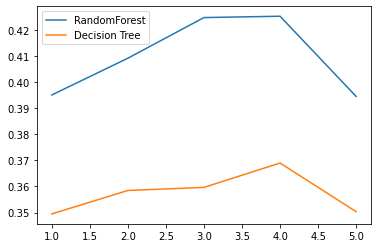

In [9]:
plt.plot(range(1,6),rfc_s,label = "RandomForest")
plt.plot(range(1,6),clf_s,label = "Decision Tree")
plt.legend()
plt.show()

In [11]:
rfc_s.mean(),clf_s.mean()

(0.40973092750870527, 0.3573789173789174)

In [14]:
# 加载模型
import joblib
estimator = joblib.load("./model_1222.pkl")

In [15]:
rfc_t = cross_val_score(estimator,dX,dY,cv=5)

In [17]:
rfc_t

array([0.3985755 , 0.41674581, 0.4257993 , 0.42725546, 0.40025324])

In [44]:
# 分集
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(dX,dY,test_size=0.2,random_state=420)
#恢复索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [45]:
#是否有样本不平衡问题？ 有轻微的样本不均衡问题
Ytrain.value_counts()

 0    51683
 1    37710
-1    36967
dtype: int64

In [46]:
Ytest.value_counts()

 0    12920
 1     9494
-1     9176
dtype: int64

In [47]:
#描述性统计
Xtrain.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
feature1_13,126360.0,-3.228870e-03,0.433290,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_21,126360.0,-2.025958e-03,0.369967,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_34,126360.0,-8.784425e-04,0.315840,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_55,126360.0,-5.302311e-04,0.271453,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_89,126360.0,-7.755619e-04,0.241408,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_144,126360.0,-4.194365e-04,0.202451,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_233,126360.0,1.661918e-04,0.169142,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature2,126360.0,1.785420e-02,45.517080,-9453.496140,-9.728231,-1.898232,-0.921171,-0.305246,-0.015366,0.332050,1.001254,10.032659,4831.209515
feature3_3,126360.0,2.789893e-06,0.003303,-0.076602,-0.009323,-0.004697,-0.003186,-0.001444,0.000000,0.001460,0.003230,0.009164,0.074689
feature3_5,126360.0,1.006150e-05,0.004213,-0.080519,-0.011893,-0.006175,-0.004151,-0.001821,0.000000,0.001881,0.004208,0.011829,0.083207


In [48]:
Xtest.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
feature1_13,31590.0,-0.002406,0.434723,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_21,31590.0,0.001045,0.371470,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_34,31590.0,-0.000380,0.322723,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_55,31590.0,0.000950,0.272401,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_89,31590.0,-0.000095,0.244409,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_144,31590.0,0.000443,0.203642,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_233,31590.0,-0.001045,0.172408,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature2,31590.0,-1.167149,155.489904,-24802.173709,-10.479539,-2.044565,-0.960606,-0.313121,-0.021912,0.329031,0.985274,10.077410,3255.188480
feature3_3,31590.0,0.000008,0.003287,-0.061983,-0.009301,-0.004662,-0.003222,-0.001442,0.000000,0.001472,0.003227,0.009292,0.043026
feature3_5,31590.0,-0.000009,0.004243,-0.063972,-0.012120,-0.006263,-0.004214,-0.001850,0.000000,0.001885,0.004170,0.011804,0.058889


In [49]:
# 找出分类型特征
classf = [x for x in list(Xtrain.columns) if 'feature1' in x or 'feature4' in x]
classf

['feature1_13',
 'feature1_21',
 'feature1_34',
 'feature1_55',
 'feature1_89',
 'feature1_144',
 'feature1_233',
 'feature4']

In [50]:
# 找出连续型特征
col = Xtrain.columns.tolist()
for i in classf:
    col.remove(i)
col

['feature2',
 'feature3_3',
 'feature3_5',
 'feature3_8',
 'feature3_13',
 'feature3_21',
 'feature3_34',
 'feature3_55',
 'feature5_8',
 'feature5_13',
 'feature5_21',
 'feature5_34',
 'feature5_55',
 'feature5_89',
 'feature6_8',
 'feature6_13',
 'feature6_21',
 'feature6_34',
 'feature6_55',
 'feature6_89']

In [51]:
# 无量纲化
from sklearn.preprocessing import StandardScaler      # 数据转换为均值为0，方差为1的数据  标准化不改变数据的分布，不会把数据变成正态分布
ss = StandardScaler()
ss = ss.fit(Xtrain.loc[:,col])
Xtrain.loc[:,col] = ss.transform(Xtrain.loc[:,col])
Xtest.loc[:,col] = ss.transform(Xtest.loc[:,col])

In [52]:
# 保存无量纲化模型
import joblib
joblib.dump(ss, "./ss_1222.pkl")

['./ss_1222.pkl']

In [53]:
Xtrain.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
feature1_13,126360.0,-3.228870e-03,0.433290,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_21,126360.0,-2.025958e-03,0.369967,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_34,126360.0,-8.784425e-04,0.315840,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_55,126360.0,-5.302311e-04,0.271453,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_89,126360.0,-7.755619e-04,0.241408,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_144,126360.0,-4.194365e-04,0.202451,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_233,126360.0,1.661918e-04,0.169142,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature2,126360.0,-6.658614e-18,1.000004,-207.692395,-0.214120,-0.042096,-0.020630,-0.007098,-0.000730,0.006903,0.021605,0.220024,106.140613
feature3_3,126360.0,-1.953926e-16,1.000004,-23.192252,-2.823323,-1.422780,-0.965378,-0.438033,-0.000845,0.441131,0.976970,2.773569,22.611433
feature3_5,126360.0,2.828503e-16,1.000004,-19.113633,-2.825189,-1.468073,-0.987649,-0.434718,-0.002388,0.444114,0.996409,2.805188,19.746800


In [54]:
Xtest.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
feature1_13,31590.0,-0.002406,0.434723,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_21,31590.0,0.001045,0.371470,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_34,31590.0,-0.000380,0.322723,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_55,31590.0,0.000950,0.272401,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_89,31590.0,-0.000095,0.244409,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_144,31590.0,0.000443,0.203642,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_233,31590.0,-0.001045,0.172408,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature2,31590.0,-0.026034,3.416092,-544.900719,-0.230626,-0.045311,-0.021497,-0.007271,-0.000874,0.006837,0.021254,0.221007,71.515649
feature3_3,31590.0,0.001545,0.995247,-18.766544,-2.816835,-1.412168,-0.976445,-0.437547,-0.000845,0.444790,0.976173,2.812281,13.025471
feature3_5,31590.0,-0.004622,1.007041,-15.185997,-2.878950,-1.488986,-1.002671,-0.441497,-0.002388,0.445103,0.987268,2.799306,13.974850


In [55]:
# 训练模型
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 查看测试集上的分数
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(n_estimators=200,random_state=30)

clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)
score_c = clf.score(Xtrain,Ytrain)
score_r = rfc.score(Xtrain,Ytrain)

score_c,score_r   # 由结果看出随机森林的效果比单个决策树要好

(1.0, 1.0)

In [56]:
# 查看测试集上的分数
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)

score_c,score_r   # 由结果看出随机森林的效果比单个决策树要好score_c = clf.score(Xtest,Ytest)

(0.3961380183602406, 0.5105729661285217)

In [57]:
# 保存模型
import joblib
joblib.dump(rfc, "./model_1222.pkl")

['./model_1222.pkl']

In [58]:
# 查看模型重要性参数
rfc.feature_importances_

array([0.00777483, 0.00592404, 0.0048776 , 0.0040277 , 0.00352603,
       0.00307974, 0.00247729, 0.05978298, 0.06188729, 0.06147147,
       0.05607555, 0.05533239, 0.055702  , 0.0560569 , 0.05682263,
       0.02697774, 0.03229247, 0.03553829, 0.03820079, 0.04050745,
       0.04232348, 0.05032096, 0.03201418, 0.03547642, 0.03816833,
       0.04038067, 0.04253751, 0.05044327])

In [59]:
# 预测值
y_predict = rfc.predict(Xtest)

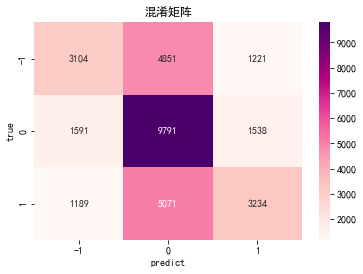

In [60]:
# 模型评估
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cfm = confusion_matrix(Ytest,y_predict,labels=[-1,0,1])
plt.rcParams['font.family']=['sans-serif']
plt.rcParams['font.sans-serif']=['SimHei']
# plt.matshow(cfm)
# plt.show()
f,ax = plt.subplots()
sns.heatmap(cfm,annot=True,ax=ax,xticklabels=[-1,0,1],yticklabels=[-1,0,1],fmt="d",cmap="RdPu")
ax.set_title('混淆矩阵')
ax.set_xlabel('predict')
ax.set_ylabel('true')
plt.show()